## Importing libraries and dateset

In [44]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
customer_df_cleaned = pd.read_csv('customer_df_cleaned.csv',index_col=[0])
customer_df_cleaned = customer_df_cleaned.drop(['index'],axis = 1)

In [46]:
customer_df_cleaned

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0.0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0.0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8692,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941.0,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
8693,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604.0,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
8694,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0.0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
8695,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941.0,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## 1.Open the categoricals variable we created before 

In [47]:
categoricals = customer_df_cleaned.select_dtypes(np.object)
categoricals.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## 2.Plot all the categorical variables with the proper plot. What can you see?

STATE


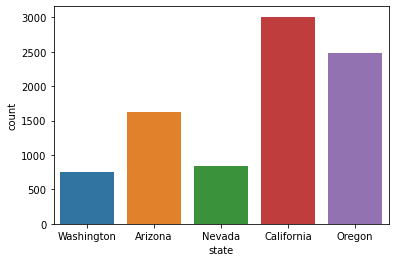

RESPONSE


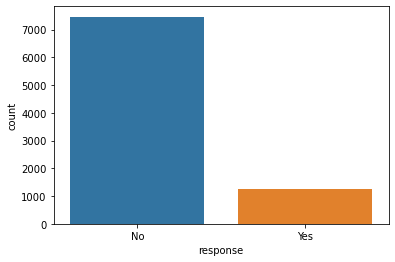

COVERAGE


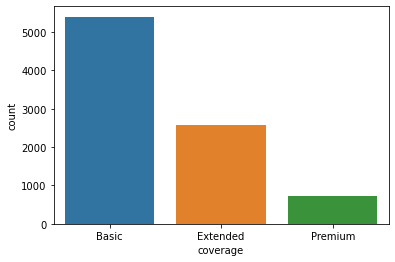

EDUCATION


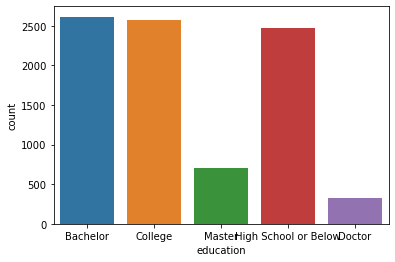

EMPLOYMENTSTATUS


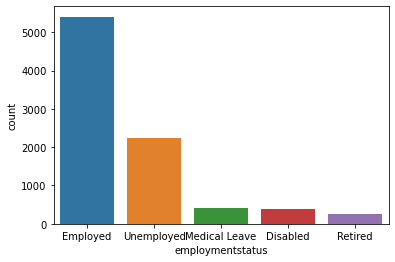

GENDER


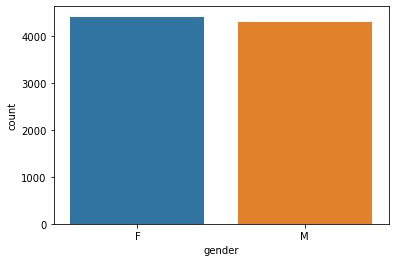

LOCATION_CODE


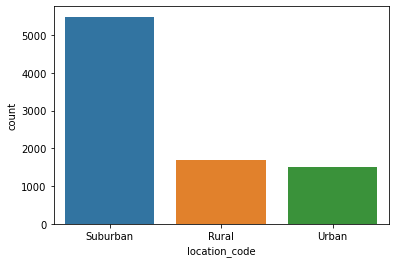

MARITAL_STATUS


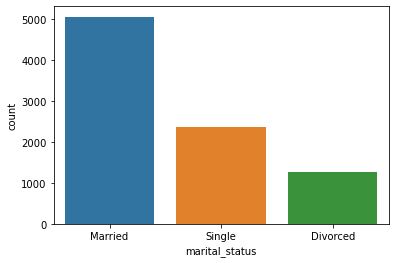

POLICY_TYPE


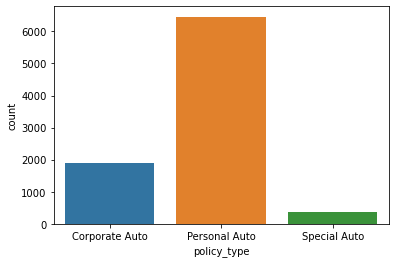

POLICY


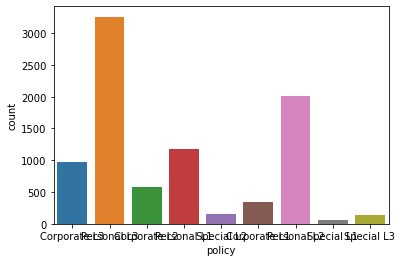

RENEW_OFFER_TYPE


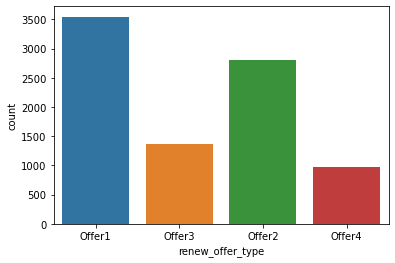

SALES_CHANNEL


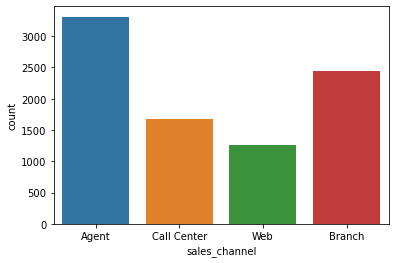

VEHICLE_CLASS


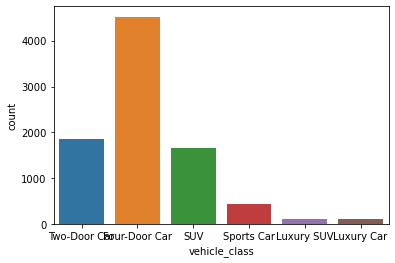

VEHICLE_SIZE


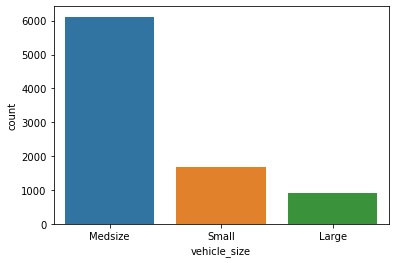

In [48]:
for column in categoricals.columns:
    if column == 'effective_to_date':  ##we will plot this column in the next exercise
        continue
    sns.countplot(x = categoricals[column])
    print(column.upper())
    plt.show()

## 3.There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?


In [49]:
for column in categoricals.columns:
    if column!='effective_to_date':
        print('*********', column.upper(), '***************')
        print(categoricals[column].value_counts())
        print('---------------------------------------------')

********* STATE ***************
California    3010
Oregon        2478
Arizona       1624
Nevada         833
Washington     752
Name: state, dtype: int64
---------------------------------------------
********* RESPONSE ***************
No     7461
Yes    1236
Name: response, dtype: int64
---------------------------------------------
********* COVERAGE ***************
Basic       5398
Extended    2566
Premium      733
Name: coverage, dtype: int64
---------------------------------------------
********* EDUCATION ***************
Bachelor                2616
College                 2577
High School or Below    2474
Master                   704
Doctor                   326
Name: education, dtype: int64
---------------------------------------------
********* EMPLOYMENTSTATUS ***************
Employed         5405
Unemployed       2231
Medical Leave     409
Disabled          386
Retired           266
Name: employmentstatus, dtype: int64
---------------------------------------------
********* GEN

## 4.Plot time variable. Can you extract something from it?

In [50]:
customer_df_cleaned['effective_to_date'] = pd.to_datetime(customer_df_cleaned['effective_to_date'], errors='coerce')
customer_df_cleaned['effective_to_date'].head(10)

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
5   2011-01-25
6   2011-02-24
7   2011-01-18
8   2011-02-17
9   2011-02-21
Name: effective_to_date, dtype: datetime64[ns]

<AxesSubplot:ylabel='effective_to_date'>

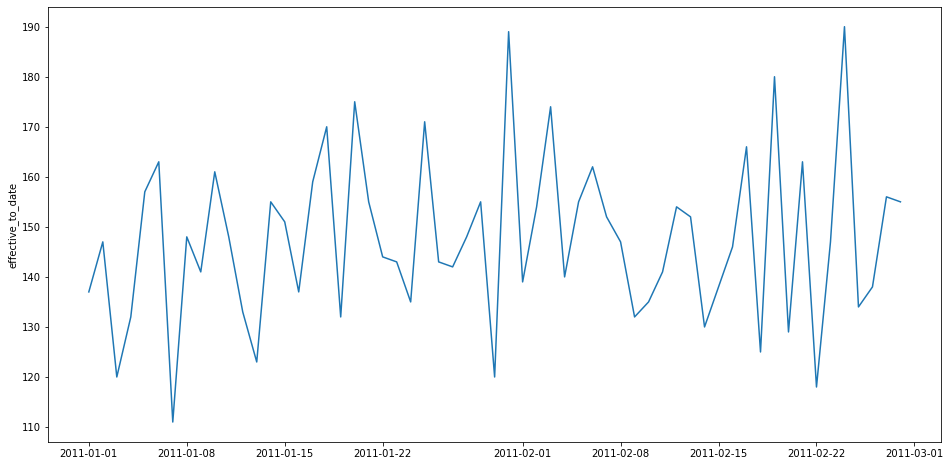

In [51]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=customer_df_cleaned['effective_to_date'].unique(), y = customer_df_cleaned['effective_to_date'].value_counts())